## Hinzufügen neuer EV-Modelle in diesem Notebook weiter unten

In [1]:
import json
import pandas as pd
from os import listdir

# Verschiedene Testzellen

Umwandlung von csv-Dateien in parquet-files weiter unten

In [3]:
folder = 'cars'
files_car = [file for file in listdir(folder) if file.__contains__('')]

In [63]:
original_df = pd.read_csv("cars_other/csv/Hyundai_KONA_64kWh.csv", sep=';', decimal=',', names=["soc", "power"])

In [9]:
df_day = pd.DataFrame()
df_day.index = pd.date_range(start='20.02.2023 00:00:00', end='21.02.2023 00:00:00', freq='Min')

In [11]:
df_sliced = df[::4]

In [12]:
for row in df_day.iterrows():
    test = row[1]
    print(row[1])

soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed     2.0
Name: 2023-02-20 00:00:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed     4.0
Name: 2023-02-20 00:01:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed     6.0
Name: 2023-02-20 00:02:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed     8.0
Name: 2023-02-20 00:03:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed    10.0
Name: 2023-02-20 00:04:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed    12.0
Name: 2023-02-20 00:05:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_summed    14.0
Name: 2023-02-20 00:06:00, dtype: float64
soc                      10.5
soc_per_minute            2.0
soc_per_minute_s

In [16]:
df.to_parquet('Tesla_Model_SX_LR.parquet', engine='fastparquet')

In [36]:
df_imported = pd.read_parquet('cars/Tesla_Model3_LR.parquet')
print(df_imported.info())
df = df_imported.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   soc     401 non-null    float64
 1   power   401 non-null    object 
dtypes: float64(1), object(1)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   soc     401 non-null    float64
 1   power   401 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB
None


## Hinzufügen Ladekurven neuer EV-Modelle:

Mit diesem Skript werden neue parquet-files erzeugt, die in der Simulation verwendet werden können. Dafür wird die entsprechende CSV-Datei eingelesen, die Daten angepasst und anschließend in einem DataFrame gespeichert. Das Dataframe wird dann in einem parquet-file gesichert.

In [3]:
import pandas as pd
import numpy as np

# DataFrame erstellen
# Hier Dateinamen der csv-Datei anpassen
original_df = pd.read_csv("cars_other/csv/Tesla_ModelY.csv", sep=';', decimal=',', names=["soc", "power"])

original_df = original_df.astype(float)

# DataFrame mit "soc" in 0.25er Schritten von 0 bis 100
new_soc_values = np.arange(0, 100.25, 0.25)
new_df = pd.DataFrame({'soc': new_soc_values})

# Sortieren des ursprünglichen DataFrames nach der "soc"-Spalte
original_df = original_df.sort_values(by='soc')

# Zuordnung der Lastwerte zu den entsprechenden soc-Werten im neuen Dataframe
new_df['power'] = original_df['power'].values[np.clip(np.searchsorted(original_df['soc'], new_df['soc'].values, side='right') - 1, 0, None)]

# Ausgabe des neuen DataFrames
print(new_df)

# Hier den Dateinamen des neuen DateFrames anpassen:
new_df.to_parquet('Tesla_ModelY.parquet', engine='fastparquet')
print(new_df.info())


        soc       power
0      0.00  101.494104
1      0.25  101.494104
2      0.50  101.431558
3      0.75  102.267147
4      1.00  102.267147
..      ...         ...
396   99.00   17.978914
397   99.25   16.825773
398   99.50   15.586937
399   99.75   14.339849
400  100.00   14.339849

[401 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   soc     401 non-null    float64
 1   power   401 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB
None


In [40]:
for row in new_df.iterrows():
    new_df.loc[row[0], 'power'] = 100

In [41]:
new_df.to_parquet('dummy100kW.parquet', engine='fastparquet')

In [65]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   soc     401 non-null    float64
 1   power   401 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB
None


## Plot aller Ladekurven in dem Ordner 'cars'

2021_FIAT_500e_Hatchback.parquet: dummy100kW.parquet: Hyundai_IONIQ5_LongRange.parquet: Hyundai_KONA_64kWh.parquet: Porsche_Taycan.parquet: Tesla_Model3_LR.parquet: Tesla_ModelY.parquet: Tesla_Model_SX_LR.parquet: VW_ID3_Pure_45kWh.parquet: 

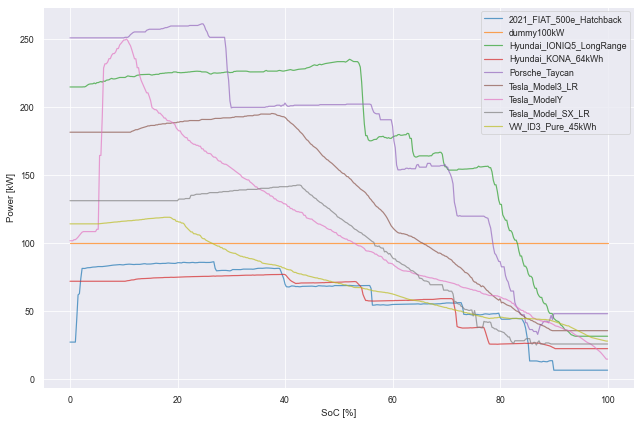

In [3]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#%matplotlib qt5

sns.set_context('paper')
plt.figure(figsize=(9,6))

for file in listdir('cars'):
    print(file, end=': ')
    df = pd.read_parquet(f'cars/{file}')
    cols = df.columns
    df = df.astype(float)
    # df.to_parquet(f'cars/{file}')
    plt.plot(df["soc"].values, df["power"].values, alpha=0.7, label=file.replace(".parquet", ""))
plt.xlabel('SoC [%]')
plt.ylabel('Power [kW]')
plt.legend()
plt.tight_layout()
#plt.savefig(f'cars_plots/combined')
plt.show()
plt.close()

## Vergleich fastnet - EVKX

Hier werden die Ladekurve des Hyundai KONA 64kWh von fastnet.nl und evkx miteinander vergleichen:

In [64]:
df_original_kona_fastnet = pd.read_csv("cars_other/csv/Hyundai_KONA_64kWh.csv", sep=';', decimal=',', names=["soc", "power"])
df_original_kona_evkx = pd.read_csv("cars_other/csv/Hyundai_KONA_64kWh_evkx.csv", sep=';', decimal=',', names=["soc", "power"])
df_original_vw_id3_fastned = pd.read_csv("cars_other/csv/VW_ID3_Pure_45kWh.csv", sep=';', decimal=',', names=["soc", "power"])
df_original_vw_id3_evkx = pd.read_csv("cars_other/csv/VW_ID3_Pure_evkx.csv", sep=';', decimal=',', names=["soc", "power"])

In [65]:
df_original_vw_id3_fastned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   soc     380 non-null    float64
 1   power   380 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


In [66]:
df_original_vw_id3_evkx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   soc     101 non-null    int64
 1   power   101 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [51]:
print(df_original_vw_id3_evkx["power"].values)

[ 60 112 114 123 127 128 129 130 130 130 131 131 131 131 131 131 133 132
 133 130 126 122 118 115 111 109 107 106 103 101 100  98  97  96  95  93
  91  90  88  87  85  83  82  81  80  79  78  77  75  74  73  72  71  70
  69  68  67  66  65  63  62  61  58  57  56  55  54  53  52  50  50  49
  50  50  50  50  50  50  50  50  50  50  48  46  44  40  37  33  32  31
  30  29  28  26  25  25  24  23  22  21   3]


ValueError: x and y must have same first dimension, but have shapes (380,) and (320,)

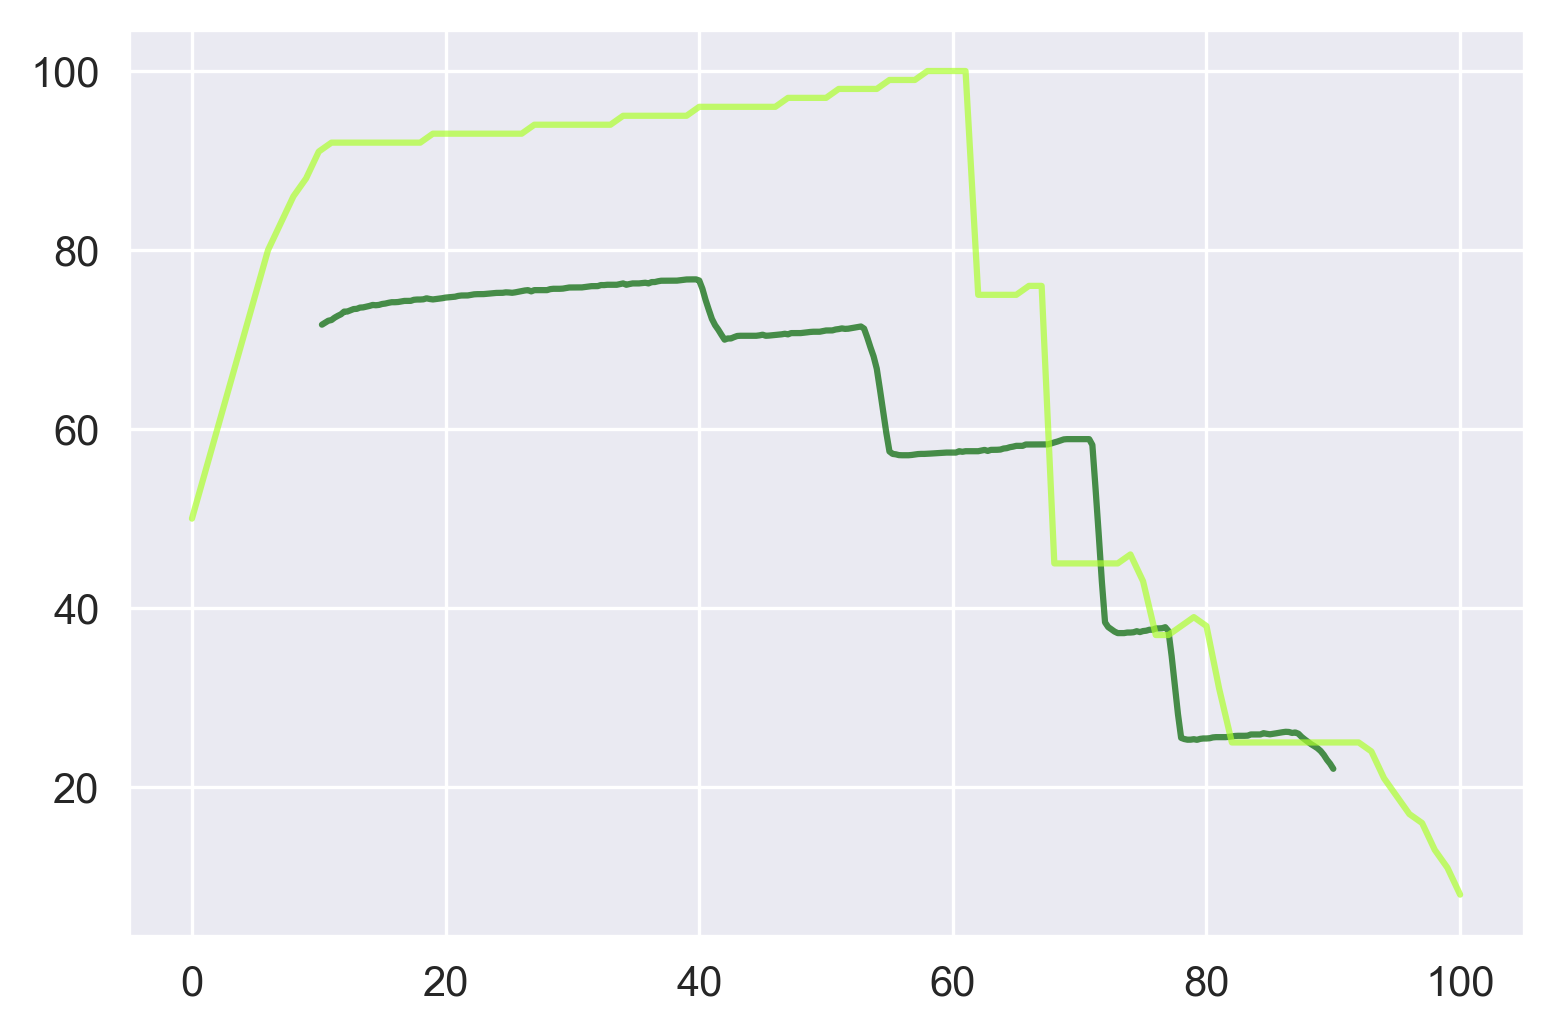

In [52]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)

plt.plot(df_original_kona_fastnet["soc"].values, df_original_kona_fastnet["power"].values, alpha=0.7, color="darkgreen",  label="Hyundai KONA - fastned.nl")
# print(df_original_kona_evkx["power"].values)
plt.plot(df_original_kona_evkx["soc"].values, df_original_kona_evkx["power"].values, alpha=0.7, color="greenyellow", label="Hyundai KONA - evkx.net")

plt.plot(df_original_vw_id3_fastned["soc"].values, df_original_kona_fastnet["power"].values, alpha=0.7, color="cyan", label="VW ID3 - fastned")
plt.plot(df_original_vw_id3_evkx["soc"].values, df_original_vw_id3_evkx["power"].values, alpha=0.7, color="blue", label="VW ID3 - evkx.net")

plt.xlabel('SoC [%]')
plt.ylabel('Power [kW]')
plt.legend()
plt.tight_layout()


<Figure size 1800x1200 with 0 Axes>

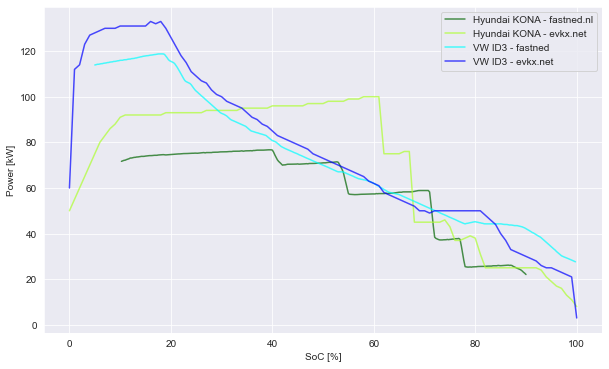

In [75]:
import matplotlib.pyplot as plt

# Annahme: Die DataFrames sind bereits vorhanden (df_original_kona_fastnet, df_original_kona_evkx, df_original_vw_id3_fastned, df_original_vw_id3_evkx)

# Extrahiere Daten aus den DataFrames
soc_kona_fastnet = df_original_kona_fastnet['soc'].values
power_kona_fastnet = df_original_kona_fastnet['power'].values

soc_kona_evkx = df_original_kona_evkx['soc'].values
power_kona_evkx = df_original_kona_evkx['power'].values

soc_vw_id3_fastned = df_original_vw_id3_fastned['soc'].values
power_vw_id3_fastned = df_original_vw_id3_fastned['power'].values

soc_vw_id3_evkx = df_original_vw_id3_evkx['soc'].values
power_vw_id3_evkx = df_original_vw_id3_evkx['power'].values

# Erstelle den Plot
plt.figure(dpi=300)
plt.figure(figsize=(10, 6))

plt.plot(soc_kona_fastnet, power_kona_fastnet, alpha=0.7, color="darkgreen",  label="Hyundai KONA - fastned.nl")
plt.plot(soc_kona_evkx, power_kona_evkx, alpha=0.7, color="greenyellow", label="Hyundai KONA - evkx.net")
plt.plot(soc_vw_id3_fastned, power_vw_id3_fastned, alpha=0.7, color="cyan", label="VW ID3 - fastned")
plt.plot(soc_vw_id3_evkx, power_vw_id3_evkx, alpha=0.7, color="blue", label="VW ID3 - evkx.net")

# Füge Beschriftungen und Legende hinzu
# plt.title('Power vs SOC')
plt.xlabel('SoC [%]')
plt.ylabel('Power [kW]')
plt.legend()

# Zeige den Plot an
plt.show()
